# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# LOADING DATASET

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

# SPLITING DATASET

In [4]:
X,y=mnist.data,mnist.target

In [11]:
split_ratio=0.8
split_index=int(len(X)*split_ratio)

In [12]:
X_train,X_test=X[:split_index],X[split_index:]
y_train,y_test=y[:split_index],y[split_index:]

In [15]:
import numpy as np

In [17]:
X_train = np.array(X_train)
X_test= np.array(X_test)

y_train= np.array(y_train)
y_test= np.array(y_test)

In [26]:
X_train = X_train.reshape(-1, 28, 28)
X_test= X_test.reshape(-1, 28, 28)

In [27]:
X_train.shape

(56000, 28, 28)

In [41]:
y_train = y_train.astype('int64')

In [ ]:
y_test = y_test.astype('int64')

In [33]:
X_train=X_train/255
X_test=X_test/255

# BUILDING MODEL

In [35]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [42]:
print(y_train.dtype)

int64


In [43]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1400/1400 [==============================] - 4s 2ms/step - loss: 0.2902 - accuracy: 0.9172 - val_loss: 0.1725 - val_accuracy: 0.9490
Epoch 2/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.1234 - accuracy: 0.9627 - val_loss: 0.1397 - val_accuracy: 0.9559
Epoch 3/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9755 - val_loss: 0.1235 - val_accuracy: 0.9636
Epoch 4/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.1140 - val_accuracy: 0.9664
Epoch 5/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.1103 - val_accuracy: 0.9671
Epoch 6/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.1073 - val_accuracy: 0.9698
Epoch 7/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.1127 - val_accuracy:

# PREDICITON

In [44]:
y_probablity=model.predict(X_test)
y_probablity

438/438 [==============================] - 1s 1ms/step


array([[7.0746787e-14, 9.9999952e-01, 2.0162392e-12, ..., 3.3858768e-07,
        2.5525308e-08, 2.2829745e-11],
       [6.2198911e-13, 1.2269156e-13, 3.2901476e-17, ..., 3.8205291e-16,
        9.9999642e-01, 1.2264077e-17],
       [6.0327857e-25, 1.7165120e-22, 2.7476254e-24, ..., 1.0973761e-22,
        1.3286353e-15, 5.9152978e-07],
       ...,
       [4.6861953e-29, 8.4830417e-15, 4.3891000e-26, ..., 1.5644430e-13,
        1.9334516e-20, 6.1209921e-14],
       [9.4611926e-18, 3.0871878e-18, 4.1711417e-27, ..., 4.7823715e-17,
        3.0439268e-10, 2.0670622e-21],
       [8.9933658e-23, 1.0477640e-21, 2.6505051e-23, ..., 1.5008193e-27,
        1.6470236e-23, 4.9919146e-28]], dtype=float32)

In [49]:
y_pred=y_probablity.argmax(axis=1)
y_pred

array([1, 8, 5, ..., 4, 5, 6], dtype=int64)

In [53]:
acc_score=accuracy_score(y_test,y_pred)
acc_score

0.9757142857142858

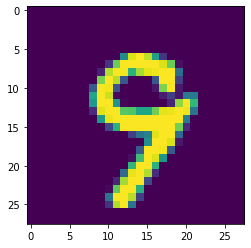

In [59]:
img=X_test[3]
plt.imshow(X_test[3])

In [60]:
model.predict(img.reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([9], dtype=int64)